In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  
import joblib
import multiprocessing as mp

import funktions as funk

import string
from nltk.corpus import stopwords as sw
from nltk.corpus import wordnet as wn
from nltk import wordpunct_tokenize
from nltk import WordNetLemmatizer
from nltk import pos_tag

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [3]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


## Target Variables

In [4]:
for y in ['toxic','severe_toxic','obscene','threat','insult','identity_hate']:
    print("--------------------")
    print(y)
    print()
    print(funk.freq(train, [y]))
    print()

--------------------
toxic

    Count   Percent
0  144277  0.904156
1   15294  0.095844

--------------------
severe_toxic

    Count   Percent
0  157976  0.990004
1    1595  0.009996

--------------------
obscene

    Count   Percent
0  151122  0.947052
1    8449  0.052948

--------------------
threat

    Count   Percent
0  159093  0.997004
1     478  0.002996

--------------------
insult

    Count   Percent
0  151694  0.950636
1    7877  0.049364

--------------------
identity_hate

    Count   Percent
0  158166  0.991195
1    1405  0.008805



In [5]:
funk.freq(train, ['toxic','severe_toxic','obscene','threat','insult','identity_hate'])

,toxic,severe_toxic,obscene,threat,insult,identity_hate,Count,Percent
0,0,0,0,0,0,0,143346,0.999623
1,0,0,0,0,0,1,54,0.000377
2,0,0,0,0,1,0,301,0.914894
3,0,0,0,0,1,1,28,0.085106
4,0,0,0,1,0,0,22,1.000000
5,0,0,0,1,1,0,3,1.000000
6,0,0,1,0,0,0,317,0.990625
7,0,0,1,0,0,1,3,0.009375
8,0,0,1,0,1,0,181,0.909548
9,0,0,1,0,1,1,18,0.090452


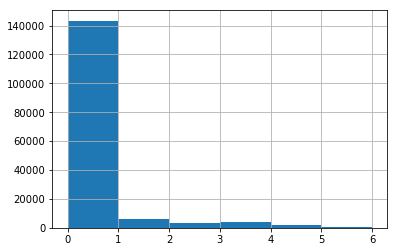

In [6]:
train[['toxic','severe_toxic','obscene','threat','insult','identity_hate']].sum(axis=1).hist(bins=6)

significant overlap of y labels; treat independently at first and then explore what information the relationships provide

## Text Characteristics

In [7]:
lens = train.comment_text.apply(lambda x: len(x))

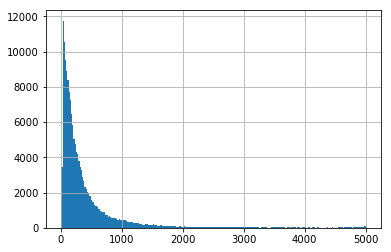

In [8]:
lens.hist(bins=250)

In [9]:
train.comment_text.head()

0    Explanation\nWhy the edits made under my usern...
1    D'aww! He matches this background colour I'm s...
2    Hey man, I'm really not trying to edit war. It...
3    "\nMore\nI can't make any real suggestions on ...
4    You, sir, are my hero. Any chance you remember...
Name: comment_text, dtype: object

In [10]:
t = train.comment_text[0]
print(t)

Explanation
Why the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27


## Text Tokenization

In [11]:
def tokenize(text):
    
    wml = WordNetLemmatizer()
    
    for token, tag in pos_tag(wordpunct_tokenize(text)):
        token = token.lower()
        token = token.strip()
        token = token.strip('_')
        token = token.strip('*')

        if token in sw.words('english'):
            continue

        if all(char in string.punctuation for char in token):
            continue
        
        tag = {
            'N': wn.NOUN,
            'V': wn.VERB,
            'R': wn.ADV,
            'J': wn.ADJ
        }.get(tag[0], wn.NOUN)
        
        lemma = wml.lemmatize(token, tag)
        
        yield lemma

In [12]:
list(tokenize(t))

['explanation',
 'edits',
 'make',
 'username',
 'hardcore',
 'metallica',
 'fan',
 'revert',
 'vandalism',
 'closure',
 'gas',
 'vote',
 'new',
 'york',
 'doll',
 'fac',
 'please',
 'remove',
 'template',
 'talk',
 'page',
 'since',
 'retire',
 '89',
 '205',
 '38',
 '27']

In [13]:
cores = mp.cpu_count()-1 #Number of CPU cores on your system
partitions = cores #Define as many partitions as you want
 
def parallelize(data, func):
    data_split = np.array_split(data, partitions)
    pool = mp.Pool(cores)
    data = pd.concat(pool.map(func, data_split))
    pool.close()
    pool.join()
    return data

def tokenize_df(df):
    df['clean_text_list'] = df['comment_text'].apply(lambda x: list(tokenize(x)))
    df['clean_text'] = df['clean_text_list'].apply(lambda x: " ".join(x))
    return df

In [ ]:
train_clean = parallelize(train, tokenize_df)

In [ ]:
test_clean = parallelize(test, tokenize_df)

In [ ]:
joblib.dump(train_clean, 'data/train_clean.pckl')
joblib.dump(test_clean, 'data/test_clean.pckl')

#train = pd.read_csv('data/train_clean.csv')
#test = pd.read_csv('data/test_clean.csv')

## Bag of Words Vectorization

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vectorizer = CountVectorizer(tokenizer=None, preprocessor=None, lowercase=False)
X = vectorizer.fit_transform(corpus.apply(lambda x: " ".join(x)))                             

In [ ]:
X